# Fresnel Alvarez lens design 
The Alvarez lens profile is 
$$
\phi(x,y)=A(xy^2+\frac{x^3}{3})
$$

for an index or refraction $n$ the profile height is then
$$
  z = \frac{\phi}{2\pi}\frac{\lambda_0}{n}  
    = A\frac{\lambda_0}{2\pi n}(xy^2+\frac{x^3}{3})
    = A_z(xy^2+\frac{x^3}{3})
$$

with $A_z=A\frac{\lambda_0}{2\pi n}$.

The focal length of a pair of Alvarez lenses with displacement $d$ is
$$
f(d;A,\lambda)=\frac{\pi}{2 d A \lambda}
$$


## Limiting A
On the parameter $A$ (and therefore the parameter $A_z$ ) depends the derivative of the phase profile. Since 
$$
\Delta x = \frac {\Delta z}{\partial_x z}
$$

And the derivative is proportional to $A$, the smaller this parameter is the smaller the derivative will be and the bigger $\Delta x$ (and $\Delta y$) will be.

On the other hand $A$ needs to garantee that with a displacement smaller than 5 mm we achieve the focal power range required (i.e. 15 to 90 mm). The 5 mm limit guarantees the size of the system to be smaller that 30mm laterally (two 20 mm lenses both displaced of 5mm in opposite directions results, indeed, in a 30 mm size device, with a clear aperture of 10 mm). 

We then use the following formula to work out the requirements
$$
f=\frac{\pi}{2 d A \lambda_0}
$$
This means also
$$
d =\frac{\pi}{2 f A \lambda_0}
$$
naming $f_1,\ f_2$ with $f_1<f_2$ then the actuation $\Delta d$ is
$$
\Delta d =\frac{\pi}{2  A \lambda_0}\left(\frac{1}{f_1}-\frac{1}{f_2}\right)
$$


In [1]:
def Alvarez_phase(XX,YY, f1, f2, tuning_distance, wavelength): 
    """
    returns the phase of an Alvarez lens profile
    
    Args:
        :XX:            x array from meshgrid 
        :YY:            y array from meshgrid 
        :f1:  shorter focal distance f1<f2
        :f2:  longer focal distance f1<f2
        :tuning_distance: tuning displacement range for the Alvarez lens
        :wavelength:    wavelength of design
    
    Note: 
    """

    A = np.pi/(2*tuning_distance*wavelength)*(1/f1-1/f2)

    phase = A*(XX*np.power(YY,2)+np.power(XX,3)/3)

    return phase


In [2]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 
from pyMOE.generate import *  

from scipy import ndimage

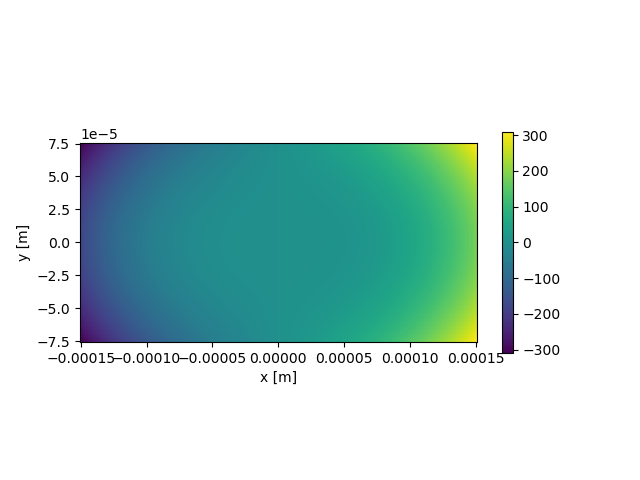

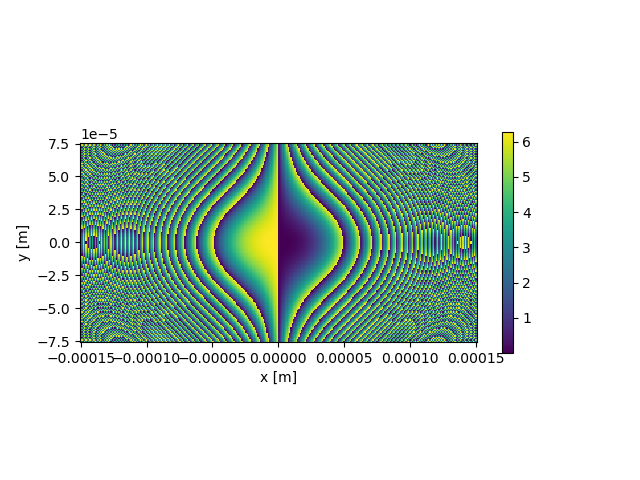

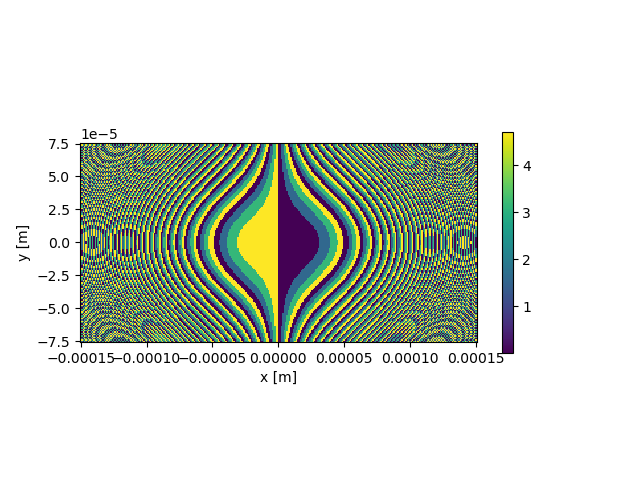

In [3]:




#attention, make sure to have enough pixels 
npix = 1000  # number of pixels 
xsiz = 1000 #x-size 
ysiz = 1000 #y-size 
ltop = 1 #topological number

aperture_width = 300*micro
aperture_height = 150*micro
x_pixel = 300
y_pixel = 150

f1 = 100*micro
f2 = 500*micro
tuning_distance = 150*micro
wavelength = 532*nano

aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.Alvarez_phase, f1=f1, f2=f2, tuning_distance=tuning_distance, wavelength=wavelength)
moe.plotting.plot_aperture(mask)


# Truncating the phase mask at multiples of 2π
mask.modulos(2*np.pi)

moe.plotting.plot_aperture(mask) 


n = 4 # number of discrete levels 

mask.discretize(n)
moe.plotting.plot_aperture(mask) 



# Design of an Alvarez lens pair

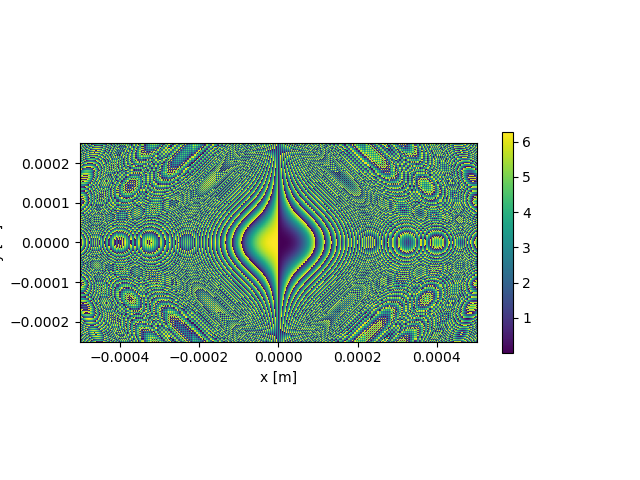

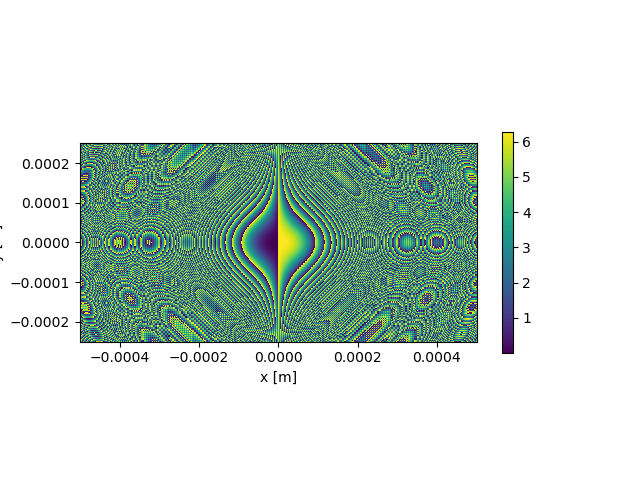

In [4]:

#attention, make sure to have enough pixels 
npix = 1000  # number of pixels 
xsiz = 1000 #x-size 
ysiz = 1000 #y-size 
ltop = 1 #topological number

aperture_width = 1000*micro
aperture_height = 500*micro
x_pixel = 1000
y_pixel = 500

f1 = 100*micro
f2 = 500*micro
tuning_distance = 1000*micro
wavelength = 532*nano


aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)
lens1 =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.Alvarez_phase, f1=f1, f2=f2, tuning_distance=tuning_distance, wavelength=wavelength)

aperture2 = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)

lens2 =  moe.generate.arbitrary_aperture_function(aperture2, moe.sag.Alvarez_phase, f1=f1, f2=f2, tuning_distance=tuning_distance, wavelength=wavelength)
# result = moe.generate.arbitrary_aperture_function(result, Alvarez_phase, f1=f1, f2=f2, tuning_distance=tuning_distance, wavelength=wavelength)
lens2.aperture = np.fliplr(lens2.aperture)



lens1.modulos(2*np.pi)
lens2.modulos(2*np.pi)


moe.plotting.plot_aperture(lens1) 
moe.plotting.plot_aperture(lens2) 


# Sum of Alvarez Lens pair with a displacement between them

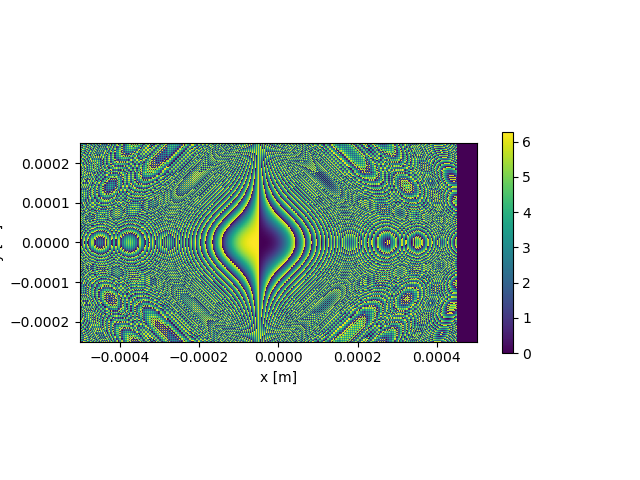

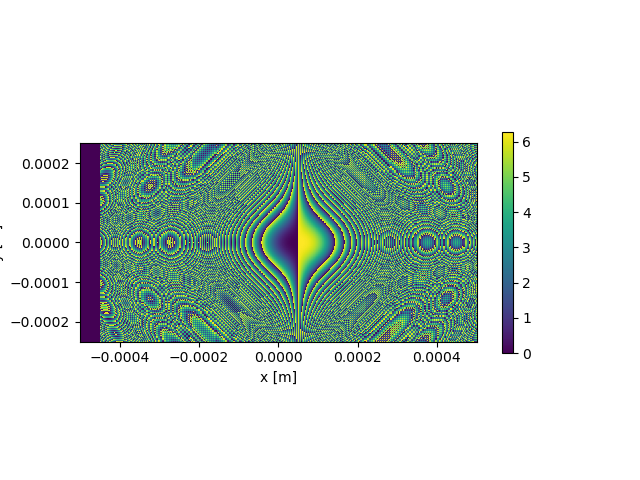

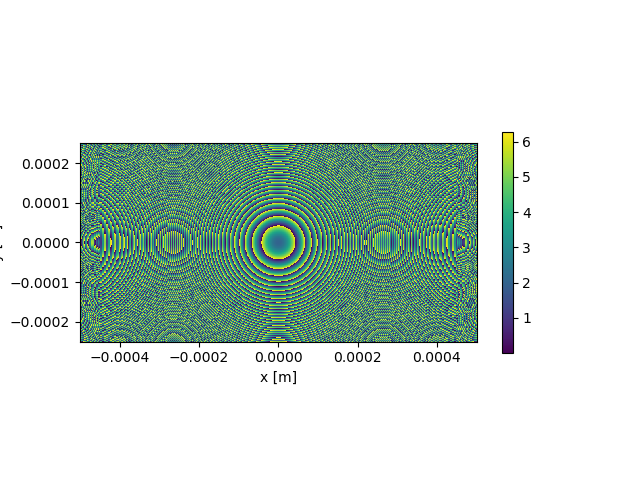

In [5]:


result = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)



# displace aperture equally both ways, total displacement is twice displacement
displacement = 50*micro
rollidx = int(np.round(displacement/lens1.pixel_x,))

roll = rollidx
lens1.aperture = np.roll(lens1.aperture, -roll, axis=1)
lens2.aperture = np.roll(lens2.aperture, roll, axis=1)

lens1.aperture[:,-roll:] = 0
lens2.aperture[:,:roll] = 0



moe.plotting.plot_aperture(lens1) 
moe.plotting.plot_aperture(lens2) 




result.aperture = lens1.aperture + lens2.aperture


result.modulos(2*np.pi)
moe.plotting.plot_aperture(result) 

# plt.pcolormesh(mask2.aperture+mask.aperture)
